In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam_ham_dataset.csv', encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2
3576,ham,missing txu lonestar and oasis paths\r\nstace...
4283,spam,meet over 1 million girls sigletos\r\nmeta ht...
2150,ham,fw : complaint department\r\nthis is another ...
4204,ham,tejas nomination change effective 7 / 7 / 00\...
1625,spam,l . a times personals : don ' t you need some...


In [4]:
df.shape

(5171, 2)

1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5171 non-null   object
 1   v2      5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [7]:
df.sample(5)

,v1,v2
2674,spam,everyone love it adam\r\nuser id : 6 eligible...
1529,ham,"hpl nom for february 6 , 2001\r\n( see attach..."
4009,ham,meter 5892 south katy gas unit 2 - allocation...
1305,ham,unresolved issues for jan 1 .\r\ni think ever...
1006,spam,\r\nthe permanent fix to penis enlargement\r\...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
703,ham,2 nd revision to sea robin volumes ( sea robi...
1937,ham,meter # 1591 lamay gaslift\r\ndaren - meter 1...
3110,ham,"fw : tribute to america\r\nregards ,\r\namy b..."
4273,ham,re : 12 / 99 k ' s needed and 1 / 2000 k ' s ...
3883,ham,"hpl nom for april 4 , 2001\r\n( see attached ..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,enron methanol ; meter # : 988291\r\nthis is ...
1,0,"hpl nom for january 9 , 2001\r\n( see attache..."
2,0,"neon retreat\r\nho ho ho , we ' re around to ..."
3,1,"photoshop , windows , office . cheap . main t..."
4,0,re : indian springs\r\nthis deal is to book t...


In [10]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()


178

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(4993, 2)

2. EDA

In [14]:
df.head()

,target,text
0,0,enron methanol ; meter # : 988291\r\nthis is ...
1,0,"hpl nom for january 9 , 2001\r\n( see attache..."
2,0,"neon retreat\r\nho ho ho , we ' re around to ..."
3,1,"photoshop , windows , office . cheap . main t..."
4,0,re : indian springs\r\nthis deal is to book t...


In [15]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

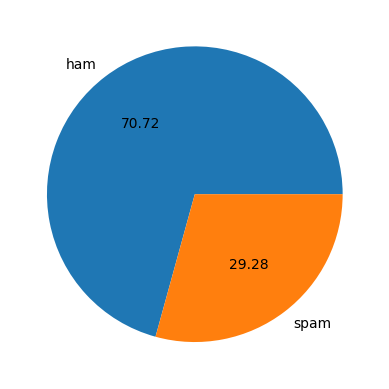

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PCC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)
df.head()

C:\Users\PCC\AppData\Local\Temp\ipykernel_20108\83982535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,enron methanol ; meter # : 988291\r\nthis is ...,319
1,0,"hpl nom for january 9 , 2001\r\n( see attache...",89
2,0,"neon retreat\r\nho ho ho , we ' re around to ...",2516
3,1,"photoshop , windows , office . cheap . main t...",406
4,0,re : indian springs\r\nthis deal is to book t...,328


In [19]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\PCC\AppData\Local\Temp\ipykernel_20108\2894533858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,enron methanol ; meter # : 988291\r\nthis is ...,319,66
1,0,"hpl nom for january 9 , 2001\r\n( see attache...",89,22
2,0,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549
3,1,"photoshop , windows , office . cheap . main t...",406,47
4,0,re : indian springs\r\nthis deal is to book t...,328,69


In [20]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\PCC\AppData\Local\Temp\ipykernel_20108\2977430178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,enron methanol ; meter # : 988291\r\nthis is ...,319,66,3
1,0,"hpl nom for january 9 , 2001\r\n( see attache...",89,22,3
2,0,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549,24
3,1,"photoshop , windows , office . cheap . main t...",406,47,3
4,0,re : indian springs\r\nthis deal is to book t...,328,69,3


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1061.426397,231.678149,13.386741
std,1547.863387,340.702932,27.960051
min,3.000000,0.000000,0.000000
25%,248.000000,53.000000,4.000000
50%,549.000000,123.000000,7.000000
75%,1254.000000,286.000000,15.000000
max,32250.000000,8861.000000,1204.000000


In [22]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,986.939394,228.516001,11.662419
std,1402.785831,337.018933,25.330035
min,10.000000,1.000000,1.000000
25%,233.000000,51.000000,4.000000
50%,530.000000,126.000000,7.000000
75%,1245.500000,296.500000,13.500000
max,32250.000000,8861.000000,1204.000000


In [23]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.0000
mean,1241.326265,239.315321,17.5513
std,1840.112883,349.439381,33.1118
min,3.000000,0.000000,0.0000
25%,296.250000,58.000000,4.0000
50%,581.000000,117.500000,9.0000
75%,1297.000000,250.750000,19.0000
max,22065.000000,3961.000000,693.0000


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

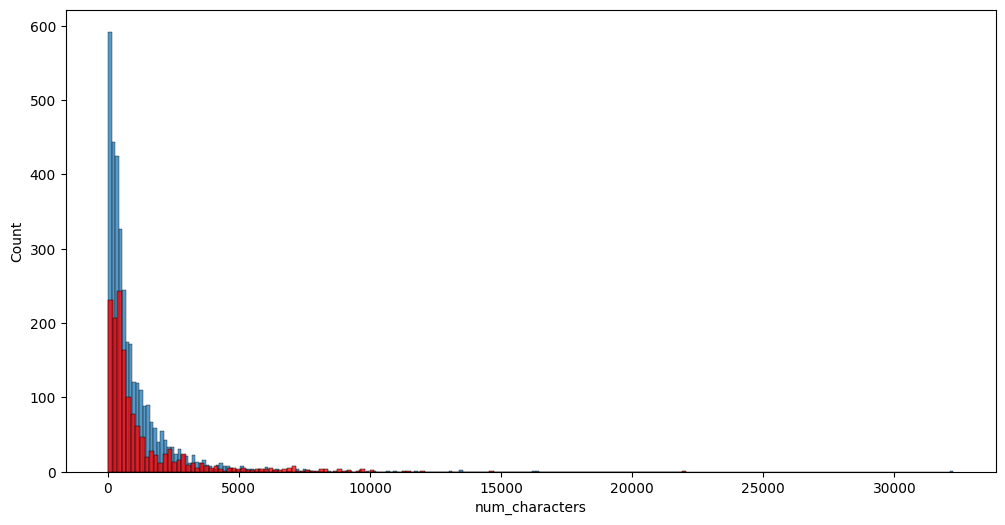

In [24]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

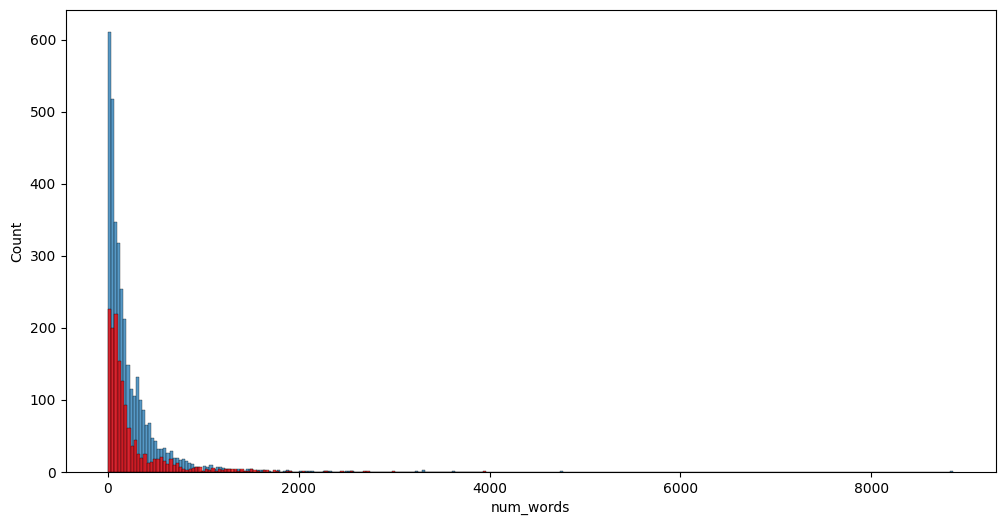

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

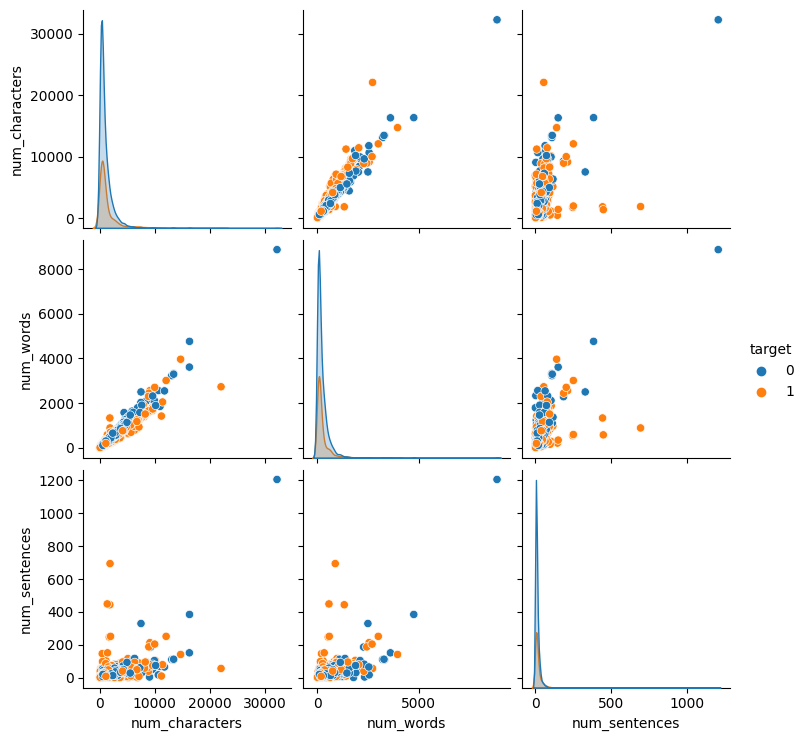

In [26]:
sns.pairplot(df,hue='target')

C:\Users\PCC\AppData\Local\Temp\ipykernel_20108\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

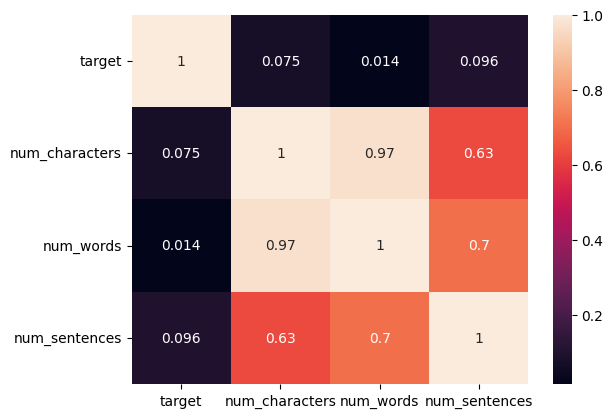

In [27]:
sns.heatmap(df.corr(),annot=True)

3. Data preprocessing

In [28]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

C:\Users\PCC\AppData\Local\Temp\ipykernel_20108\568599122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,enron methanol ; meter # : 988291\r\nthis is ...,319,66,3,enron methanol meter 988291 follow note gave m...
1,0,"hpl nom for january 9 , 2001\r\n( see attache...",89,22,3,hpl nom januari 9 2001 see attach file hplnol ...
2,0,"neon retreat\r\nho ho ho , we ' re around to ...",2516,549,24,neon retreat ho ho ho around wonder time year ...
3,1,"photoshop , windows , office . cheap . main t...",406,47,3,photoshop window offic cheap main trend abas d...
4,0,re : indian springs\r\nthis deal is to book t...,328,69,3,indian spring deal book teco pvr revenu unders...


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

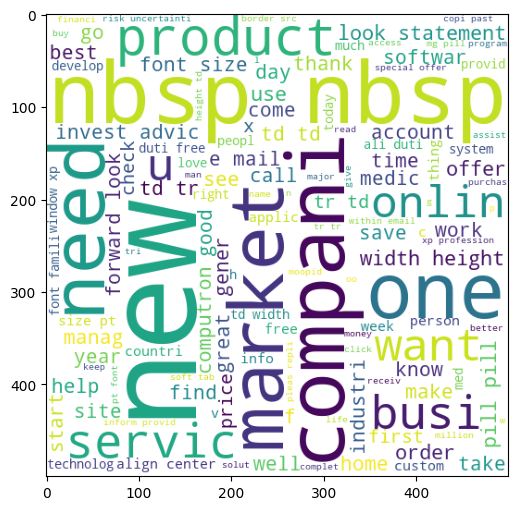

In [33]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

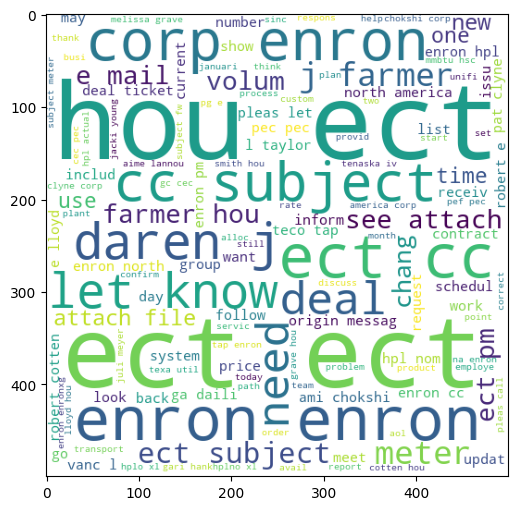

In [34]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [35]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

195130

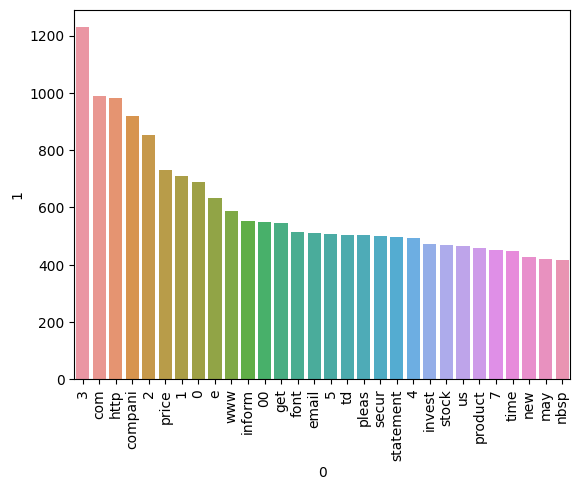

In [36]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

376944

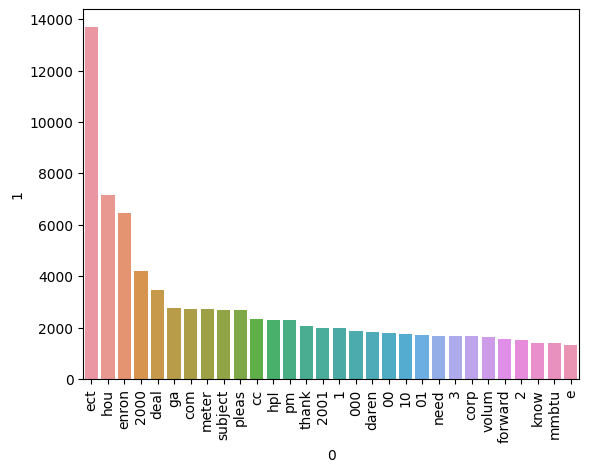

In [38]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [40]:
X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
X_tfidf.shape

(4993, 3000)

In [41]:
X_bow = cv.fit_transform(df['transformed_text']).toarray()
X_bow.shape

(4993, 42592)

In [42]:
y = df['target'].values
from sklearn.model_selection import train_test_split

In [43]:
X_train_tfidf,X_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(X_tfidf,y,test_size=0.2,random_state=2)

In [44]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow = train_test_split(X_bow,y,test_size=0.2,random_state=2)

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [46]:
mnb = MultinomialNB()
svc = SVC(kernel='linear')

In [47]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    return accuracy,precision,recall

In [48]:
accuracy_scores = []
precision_scores = []
recall_scores = []
clfs = {
    'NB + TF-IDF': mnb, 
    'NB + BOW': mnb,
    'SVC + TF-IDF' : svc, 
    'SVC + BOW' : svc,
}

In [49]:
current_accuracy,current_precision,current_recall = train_classifier(mnb, X_train_tfidf,y_train_tfidf,X_test_tfidf,y_test_tfidf)
print("For NB + TF-IDF")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For NB + TF-IDF
Accuracy -  0.9319319319319319
Precision -  0.8524096385542169
Recall -  0.9370860927152318


In [50]:
current_accuracy,current_precision,current_recall = train_classifier(mnb, X_train_bow,y_train_bow,X_test_bow,y_test_bow)
print("For NB + BoW")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For NB + BoW
Accuracy -  0.9719719719719719
Precision -  0.9448051948051948
Recall -  0.9635761589403974


In [51]:
current_accuracy,current_precision,current_recall = train_classifier(svc, X_train_tfidf,y_train_tfidf,X_test_tfidf,y_test_tfidf)
print("For SVM + TF-IDF")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For SVM + TF-IDF
Accuracy -  0.980980980980981
Precision -  0.9639344262295082
Recall -  0.9735099337748344


In [52]:
current_accuracy,current_precision,current_recall = train_classifier(svc, X_train_bow,y_train_bow,X_test_bow,y_test_bow)
print("For SVM + BoW")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)

For SVM + BoW
Accuracy -  0.965965965965966
Precision -  0.932258064516129
Recall -  0.956953642384106


In [53]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores})
performance_df

,Algorithm,Accuracy,Precision,Recall
0,NB + TF-IDF,0.931932,0.852410,0.937086
1,NB + BOW,0.971972,0.944805,0.963576
2,SVC + TF-IDF,0.980981,0.963934,0.973510
3,SVC + BOW,0.965966,0.932258,0.956954


In [54]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB + TF-IDF,Accuracy,0.931932
1,NB + BOW,Accuracy,0.971972
2,SVC + TF-IDF,Accuracy,0.980981
3,SVC + BOW,Accuracy,0.965966
4,NB + TF-IDF,Precision,0.852410
5,NB + BOW,Precision,0.944805
6,SVC + TF-IDF,Precision,0.963934
7,SVC + BOW,Precision,0.932258
8,NB + TF-IDF,Recall,0.937086
9,NB + BOW,Recall,0.963576


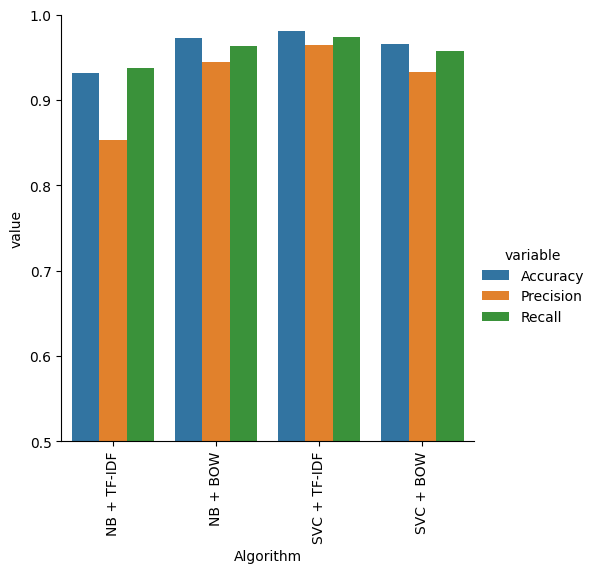

In [55]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))